In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
import librosa 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution1D, MaxPooling1D

# Define the path for your 1 second audio files
fireworks_dir = "D:/scriptie/sensor_analysis/CNN-training/data/fireworks1"
rain_dir = "D:/scriptie/sensor_analysis/CNN-training/data/rain1"
wind_dir = "D:/scriptie/sensor_analysis/CNN-training/data/wind1"




In [2]:
# Load the data
data = []
labels = []

for f in os.listdir(fireworks_dir):
    sound_clip,sr = librosa.load(os.path.join(fireworks_dir, f))
    mel_spect = librosa.feature.melspectrogram(y=sound_clip, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    melspect_processed = np.mean(mel_spect.T,axis=0)
    data.append(melspect_processed)
    labels.append("fireworks")

for f in os.listdir(rain_dir):
    sound_clip,sr = librosa.load(os.path.join(rain_dir, f))
    mel_spect = librosa.feature.melspectrogram(y=sound_clip, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    melspect_processed = np.mean(mel_spect.T,axis=0)
    data.append(melspect_processed)
    labels.append("rain")

for f in os.listdir(wind_dir):
    sound_clip,sr = librosa.load(os.path.join(wind_dir, f))
    mel_spect = librosa.feature.melspectrogram(y=sound_clip, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    melspect_processed = np.mean(mel_spect.T,axis=0)
    data.append(melspect_processed)
    labels.append("wind")



In [3]:
# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels to integers
le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))





In [4]:
data.shape

(730, 128)

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

num_labels = 3



In [6]:
# Build model
model = Sequential()

model.add(Convolution1D(128, 5, padding='same', input_shape=(128, 1)))  # Adjust input shape if necessary
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Convolution1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [8]:
# Fit the model
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_test, y_test))



Epoch 1/100
52/52 [==============================] - 3s 16ms/step - loss: 3.8697 - accuracy: 0.3992 - val_loss: 0.9162 - val_accuracy: 0.7397
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.9490 - accuracy: 0.5421 - val_loss: 0.8193 - val_accuracy: 0.7397
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.7598 - accuracy: 0.6634 - val_loss: 0.6849 - val_accuracy: 0.6621
Epoch 4/100
52/52 [==============================] - 0s 8ms/step - loss: 0.7272 - accuracy: 0.6693 - val_loss: 0.6334 - val_accuracy: 0.7489
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.5728 - accuracy: 0.7632 - val_loss: 0.5024 - val_accuracy: 0.7991
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 0.5389 - accuracy: 0.7808 - val_loss: 0.5360 - val_accuracy: 0.8082
Epoch 7/100
52/52 [==============================] - 0s 8ms/step - loss: 0.4716 - accuracy: 0.8200 - val_loss: 0.4960 - val_accuracy: 0.7854
Epoch 8/100


Epoch 59/100
52/52 [==============================] - 0s 8ms/step - loss: 0.2560 - accuracy: 0.9002 - val_loss: 0.3410 - val_accuracy: 0.8813
Epoch 60/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1932 - accuracy: 0.9276 - val_loss: 0.3396 - val_accuracy: 0.8767
Epoch 61/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2547 - accuracy: 0.8982 - val_loss: 0.3392 - val_accuracy: 0.8858
Epoch 62/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2673 - accuracy: 0.8885 - val_loss: 0.3390 - val_accuracy: 0.9041
Epoch 63/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2177 - accuracy: 0.9139 - val_loss: 0.3511 - val_accuracy: 0.8995
Epoch 64/100
52/52 [==============================] - 1s 10ms/step - loss: 0.2058 - accuracy: 0.9139 - val_loss: 0.3663 - val_accuracy: 0.8858
Epoch 65/100
52/52 [==============================] - 0s 9ms/step - loss: 0.2378 - accuracy: 0.8963 - val_loss: 0.4197 - val_accuracy: 0.8721
Epoch

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test set accuracy: {accuracy * 100}%")


7/7 [==============================] - 0s 26ms/step - loss: 0.3993 - accuracy: 0.8995
Test set accuracy: 89.95434045791626%


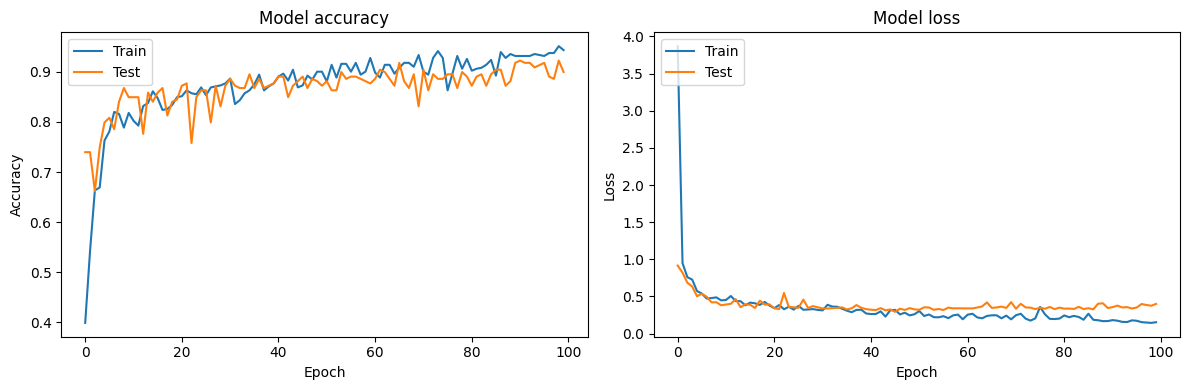

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       104
           1       0.78      0.89      0.83        66
           2       0.87      0.92      0.89        49

    accuracy                           0.87       219
   macro avg       0.87      0.88      0.87       219
weighted avg       0.88      0.87      0.87       219



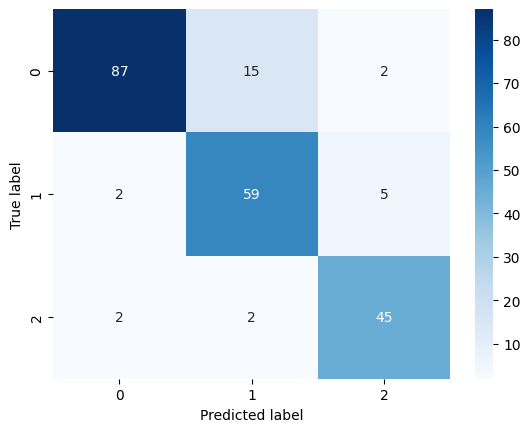

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions
predictions_prob = model.predict(x_test)

# Convert predictions classes to one hot vectors 
predictions = np.argmax(predictions_prob, axis=1) 

# Convert test set labels to one hot vectors
y_test_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test_classes, predictions))

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, predictions)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
# Save the model
model.save('1-wav-mel.h5')


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 128)          768       
                                                                 
 activation (Activation)     (None, 128, 128)          0         
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 128)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           82048     
                                                                 
 activation_1 (Activation)   (None, 16, 128)           0         
                                                        